In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving LoansTrainingSet.csv to LoansTrainingSet.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df = pd.read_csv("LoansTrainingSet.csv")

In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [ ]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [ ]:
def CategoricalaCevir(DataFrame,  CategoryLabel):
    DataFrame[CategoryLabel] = DataFrame[CategoryLabel].astype("category")

def NumerigeCevir(DataFrame,  CategoryLabel):
    DataFrame[CategoryLabel] = DataFrame[CategoryLabel].astype("float")

def TypeAyarla(DataFrame,  CategoryLabel, TypeName):
    DataFrame[CategoryLabel] = DataFrame[CategoryLabel].astype(TypeName)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [ ]:
df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [ ]:
df["Credit Score"].max() # Kredi skoru 800'den büyük olanlar var. Muhtemelen bir "0" fazladan yazıldı.

7510.0

In [ ]:
df["Years in current job"].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [ ]:
df["Annual Income"].isnull().sum()

61676

In [ ]:
df["Annual Income"].median() # Maaş bilgisi girilmeyen müşterilerin maaşını bu değerle doldurabilirim.

61242.0

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Months since last delinquent    140383
Credit Score                     61676
Annual Income                    61676
Years in current job             11476
Bankruptcies                       529
Tax Liens                           23
Home Ownership                       0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Loan ID                              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

### Customer ID

In [ ]:
CategoricalaCevir(df, "Customer ID")

In [ ]:
CategoricalaCevir(df, "Loan ID")

### Loan Status

In [ ]:
df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
statu = {"Fully Paid":1, "Charged Off":0}
df["Loan Status"] = df["Loan Status"].map(statu)

In [ ]:
df["Loan Status"].unique()

array([1, 0])

In [ ]:
TypeAyarla(df, "Loan Status", "uint8")

### Current Loan Amount

999999 değerine sahip veriler olduğunu fark ettikten sonra o verileri inceledim.

In [ ]:
df[df["Current Loan Amount"] >= 99999999]["Loan Status"].count()

35210

35210 müşterinin Current Loan Amount değeri 999999 girilmiş. Bunun neyi temsil ettiğini anlayamasam da bir şekilde göze yanlış geldiği için bu müşterilerin 999999 değerini, diğer müşterilerin ortalama değerleri ile değiştirdim.

In [ ]:
degistirme = df[df["Current Loan Amount"] < 1.5e7]["Current Loan Amount"].median()
df["Current Loan Amount"] = df["Current Loan Amount"].apply(lambda x : degistirme if x >= 99999999 else x)

In [ ]:
df[df["Current Loan Amount"] >= 99999999]["Loan Status"].count()

0

### Term

In [ ]:
df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [ ]:
CategoricalaCevir(df, "Term")

### Credit Score

Yukarıda fark ettiğim hatayı düzelttim ve boş verileri doldurdum.

In [ ]:
df.loc[df["Credit Score"] > 800, 'Credit Score'] = df["Credit Score"]/10

In [ ]:
df["Credit Score"] =  df["Credit Score"].fillna(df["Credit Score"].median())

In [ ]:
TypeAyarla(df, "Credit Score", "int16")

### Years in current job

In [ ]:
df["Years in current job"].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [ ]:
df["Years in current job"].replace(["10+ years"], 10, inplace=True)
df["Years in current job"].replace(["9 years"], 9, inplace=True)
df["Years in current job"].replace(["8 years"], 8, inplace=True)
df["Years in current job"].replace(["7 years"], 7, inplace=True)
df["Years in current job"].replace(["6 years"], 6, inplace=True)
df["Years in current job"].replace(["5 years"], 5, inplace=True)
df["Years in current job"].replace(["4 years"], 4, inplace=True)
df["Years in current job"].replace(["3 years"], 3, inplace=True)
df["Years in current job"].replace(["2 years"], 2, inplace=True)
df["Years in current job"].replace(["1 year"], 1, inplace=True)
df["Years in current job"].replace(["< 1 year"], 0.5, inplace=True)

In [ ]:
df["Years in current job"].unique()

array([10. ,  4. ,  6. ,  5. ,  nan,  3. ,  2. ,  0.5,  1. ,  7. ,  9. ,
        8. ])

In [ ]:
df["Years in current job"] =  df["Years in current job"].fillna(0)

In [ ]:
df["Years in current job"]

0         10.0
1          4.0
2         10.0
3         10.0
4          4.0
          ... 
256979     2.0
256980    10.0
256981     9.0
256982     9.0
256983    10.0
Name: Years in current job, Length: 256984, dtype: float64

In [ ]:
NumerigeCevir(df, "Years in current job")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan ID                       256984 non-null  category
 1   Customer ID                   256984 non-null  category
 2   Loan Status                   256984 non-null  uint8   
 3   Current Loan Amount           256984 non-null  float64 
 4   Term                          256984 non-null  category
 5   Credit Score                  256984 non-null  int16   
 6   Years in current job          256984 non-null  float64 
 7   Home Ownership                256984 non-null  object  
 8   Annual Income                 195308 non-null  float64 
 9   Purpose                       256984 non-null  object  
 10  Monthly Debt                  256984 non-null  object  
 11  Years of Credit History       256984 non-null  float64 
 12  Months since last delinquent  

### Home Ownership

In [ ]:
df["Home Ownership"] = df["Home Ownership"].replace("HaveMortgage", "Home Mortgage")

In [ ]:
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [ ]:
CategoricalaCevir(df, "Home Ownership")

###  Annual Income

Yıllık gelir üzerinden aylık geliri hesabı yapacağım. Bunu müşterilerin aylık mevcut kredi borçlarıyla oranlayıp faydalı bir sutün elde etmeyi planlıyorum.

In [ ]:
df["Annual Income"].isnull().sum()

61676

In [ ]:
df["Annual Income"] = df["Annual Income"].fillna(df["Annual Income"].median())

In [ ]:
df["Annual Income"].isnull().sum()

0

In [ ]:
df["Annual Income"].max()

8713547.0

### Aylık Gelir

In [ ]:
df["Aylık Gelir"] = df["Annual Income"]/12

In [ ]:
df["Aylık Gelir"].head()

0    2807.833333
1    3522.416667
2    7510.500000
3    3172.666667
4    4168.750000
Name: Aylık Gelir, dtype: float64

### Purpose

In [ ]:
df["Purpose"].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

iki farklı "other" var. Bunları birleştiriyorum.

In [ ]:
df["Purpose"].replace("other", "Other", inplace = True)

In [ ]:
df["Purpose"].unique()

array(['Debt Consolidation', 'Other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Buy a Car', 'Medical Bills',
       'Take a Trip', 'Educational Expenses'], dtype=object)

In [ ]:
CategoricalaCevir(df, "Purpose")

### Monthly Debt

In [ ]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace(r'\D', '').astype(int)

In [ ]:
df["Monthly Debt"].head()

0     58403
1    110604
2    132185
3     75192
4     35518
Name: Monthly Debt, dtype: int64

In [ ]:
df.loc[df["Monthly Debt"] > -1, 'Monthly Debt'] = df["Monthly Debt"]/100

In [ ]:
df["Monthly Debt"].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

### Aylık Borç Oranı

In [ ]:
df["Aylık Borç Oranı"] = df['Monthly Debt'] / df["Aylık Gelir"]

In [ ]:
df["Aylık Borç Oranı"].head()

0    0.208000
1    0.314000
2    0.176000
3    0.236999
4    0.085201
Name: Aylık Borç Oranı, dtype: float64

In [ ]:
df["Aylık Borç Oranı"] = df["Aylık Borç Oranı"].fillna(df["Aylık Borç Oranı"].median())

### Months since last delinquent

In [ ]:
df["Months since last delinquent"].isnull().sum()

140383

In [ ]:
df["Months since last delinquent"].describe()

count    116601.000000
mean         34.881450
std          21.854165
min           0.000000
25%          16.000000
50%          32.000000
75%          51.000000
max         176.000000
Name: Months since last delinquent, dtype: float64

In [ ]:
df["Months since last delinquent"] = df["Months since last delinquent"].fillna(df["Months since last delinquent"].median())

In [ ]:
df["Months since last delinquent"].isnull().sum()

0

### Number of Open Accounts

In [ ]:
df["Number of Open Accounts"].unique()

array([10, 17,  5,  9, 12,  4,  7, 11,  8, 13, 14, 16, 22, 34, 28,  6, 15,
        3, 24,  2, 21, 20, 19, 25, 29, 18, 23, 35, 32, 31, 26, 47, 30, 27,
       37, 40, 33, 36, 39, 38, 42, 48, 76, 50, 44, 41,  1, 56, 43, 53,  0,
       46, 49, 45, 55, 52, 51, 58, 54])

In [ ]:
TypeAyarla(df, "Number of Open Accounts", "uint8")

### Number of Credit Problems

In [ ]:
df["Number of Credit Problems"].unique()

array([ 0,  1,  2,  5,  3,  4,  6,  7,  9, 10,  8, 11])

In [ ]:
TypeAyarla(df, "Number of Credit Problems", "uint8")

### Maximum Open Credit

In [ ]:
df["Maximum Open Credit"].isnull().sum()

0

In [ ]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].str.extract(r"(\d+)", expand=False).astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan ID                       256984 non-null  category
 1   Customer ID                   256984 non-null  category
 2   Loan Status                   256984 non-null  uint8   
 3   Current Loan Amount           256984 non-null  float64 
 4   Term                          256984 non-null  category
 5   Credit Score                  256984 non-null  int16   
 6   Years in current job          256984 non-null  float64 
 7   Home Ownership                256984 non-null  category
 8   Annual Income                 256984 non-null  float64 
 9   Purpose                       256984 non-null  category
 10  Monthly Debt                  256984 non-null  float64 
 11  Years of Credit History       256984 non-null  float64 
 12  Months since last delinquent  

###  Bankruptcies

In [ ]:
df["Bankruptcies"].isnull().sum()

529

In [ ]:
df["Bankruptcies"] = df["Bankruptcies"].fillna(df["Bankruptcies"].median())

In [ ]:
df["Bankruptcies"].isnull().sum()

0

### Tax Liens

In [ ]:
df["Tax Liens"].isnull().sum()

23

In [ ]:
df["Tax Liens"] = df["Tax Liens"].fillna(df["Tax Liens"].median())

In [ ]:
df["Bankruptcies"].isnull().sum()

0

In [ ]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent         0
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit             224220
Bankruptcies                         0
Tax Liens                            0
Aylık Gelir                          0
Aylık Borç Oranı                     0
dtype: int64

### Credit Balance / Usage

In [ ]:
df["Credit Utilization"] = df["Current Credit Balance"] / df["Maximum Open Credit"]

In [ ]:
df["Credit Utilization"].isnull().sum()

224426

In [ ]:
import numpy as np
df.loc[df["Credit Utilization"].isin([np.nan, np.inf, -np.inf]), "Credit Utilization"] = 0

### ID 

In [ ]:
loanID = df["Loan ID"].tolist()
customerID = df["Customer ID"].tolist()
ID_list = [loanID[i] + " : " + customerID[i] for i in range(len(customerID))]
df["ID"] = ID_list

df.set_index("ID", inplace = True)

## Outliers Kontrolü

In [ ]:
df.describe()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Aylık Gelir,Aylık Borç Oranı,Credit Utilization
count,256984.000000,256984.000000,256984.000000,256984.000000,2.569840e+05,256984.000000,256984.000000,256984.000000,256984.000000,256984.000000,2.569840e+05,3.276400e+04,256984.000000,256984.000000,256984.000000,256984.000000,256984.000000
mean,0.685611,13716.392347,723.314424,5.648177,6.938215e+04,963.310424,18.290195,33.307397,11.106267,0.156628,1.540656e+04,3.749965e+04,0.110089,0.027200,5781.845914,0.175936,0.070410
std,0.464273,7702.180566,24.455614,3.687284,5.153170e+04,634.119410,7.075747,14.790530,4.982982,0.460731,1.966506e+04,8.490012e+05,0.335920,0.245939,4294.308308,0.092729,0.203956
min,0.000000,505.000000,585.000000,0.000000,0.000000e+00,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8299.000000,718.000000,2.000000,4.965700e+04,531.992500,13.500000,32.000000,8.000000,0.000000,5.974000e+03,1.274775e+04,0.000000,0.000000,4138.083333,0.110127,0.000000
50%,1.000000,12058.000000,730.000000,6.000000,6.124200e+04,844.520000,17.000000,32.000000,10.000000,0.000000,1.107800e+04,2.167200e+04,0.000000,0.000000,5103.500000,0.168000,0.000000
75%,1.000000,17793.000000,738.000000,10.000000,7.689325e+04,1252.452500,21.700000,32.000000,14.000000,0.000000,1.931900e+04,3.590325e+04,0.000000,0.000000,6407.770833,0.231000,0.000000
max,1.000000,41000.000000,751.000000,10.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,11.000000,1.731412e+06,1.516913e+08,7.000000,11.000000,726128.916667,2.173164,1.281033


In [ ]:
df = df[df["Aylık Gelir"] < (df["Aylık Gelir"].mean() + (3 * df["Aylık Gelir"].std()))]
df = df[df["Aylık Gelir"] > (df["Aylık Gelir"].mean() - (3 * df["Aylık Gelir"].std()))]

In [ ]:
df = df[df["Monthly Debt"] < (df["Monthly Debt"].mean() + (3 * df["Monthly Debt"].std()))]
df = df[df["Monthly Debt"] > (df["Monthly Debt"].mean() - (3 * df["Monthly Debt"].std()))]

In [ ]:
df = df[df["Number of Open Accounts"] < (df["Number of Open Accounts"].mean() + (3 * df["Number of Open Accounts"].std()))]
df = df[df["Number of Open Accounts"] > (df["Number of Open Accounts"].mean() - (3 * df["Number of Open Accounts"].std()))]

In [ ]:
df = df[df["Months since last delinquent"] < (df["Months since last delinquent"].mean() + (3 * df["Months since last delinquent"].std()))]
df = df[df["Months since last delinquent"] > (df["Months since last delinquent"].mean() - (3 * df["Months since last delinquent"].std()))]

In [ ]:
df = df[df["Number of Credit Problems"] < (df["Number of Credit Problems"].mean() + (3 * df["Number of Credit Problems"].std()))]
df = df[df["Number of Credit Problems"] > (df["Number of Credit Problems"].mean() - (3 * df["Number of Credit Problems"].std()))]

In [ ]:
df = df[df["Aylık Borç Oranı"] < (df["Aylık Borç Oranı"].mean() + (3 * df["Aylık Borç Oranı"].std()))]
df = df[df["Aylık Borç Oranı"] > (df["Aylık Borç Oranı"].mean() - (3 * df["Aylık Borç Oranı"].std()))]

In [ ]:
df = df[df["Bankruptcies"] < 2]
df = df[df["Tax Liens"] < 2]

## Getting Dummies

In [ ]:
X_new = df[["Credit Score", "Aylık Gelir", "Years of Credit History", "Years in current job", "Months since last delinquent", "Current Loan Amount", "Monthly Debt", "Number of Open Accounts", "Aylık Borç Oranı", "Credit Utilization"]]

In [ ]:
X_new_dummies = pd.get_dummies(X_new, drop_first=True)

In [ ]:
X_new_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239455 entries, 000025bb-5694-4cff-b17d-192b1a98ba44 : 5ebc8bb1-5eb9-4404-b11b-a6eebc401a19 to ffffe32e-ed17-459f-9cfd-7b9ee7972933 : 97281336-1e45-41d2-acb2-263ce56a590e
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Credit Score                  239455 non-null  int16  
 1   Aylık Gelir                   239455 non-null  float64
 2   Years of Credit History       239455 non-null  float64
 3   Years in current job          239455 non-null  float64
 4   Months since last delinquent  239455 non-null  float64
 5   Current Loan Amount           239455 non-null  float64
 6   Monthly Debt                  239455 non-null  float64
 7   Number of Open Accounts       239455 non-null  uint8  
 8   Aylık Borç Oranı              239455 non-null  float64
 9   Credit Utilization            239455 non-null  float64
dtypes: float64(8), int16(1), u

In [ ]:
df.drop_duplicates(subset=["Loan ID", "Customer ID"], inplace = True)

In [ ]:
df.drop('Loan ID', inplace=True, axis=1)

In [ ]:
df.drop('Customer ID', inplace=True, axis=1)

In [ ]:
df.drop(["Current Credit Balance", "Maximum Open Credit"], axis = 1, inplace = True)

In [ ]:
df_new = pd.get_dummies(df, drop_first = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201157 entries, 000025bb-5694-4cff-b17d-192b1a98ba44 : 5ebc8bb1-5eb9-4404-b11b-a6eebc401a19 to ffffe32e-ed17-459f-9cfd-7b9ee7972933 : 97281336-1e45-41d2-acb2-263ce56a590e
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan Status                   201157 non-null  uint8   
 1   Current Loan Amount           201157 non-null  float64 
 2   Term                          201157 non-null  category
 3   Credit Score                  201157 non-null  int16   
 4   Years in current job          201157 non-null  float64 
 5   Home Ownership                201157 non-null  category
 6   Annual Income                 201157 non-null  float64 
 7   Purpose                       201157 non-null  category
 8   Monthly Debt                  201157 non-null  float64 
 9   Years of Credit History       201157 non-null  float64 
 10  Months since l

In [ ]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Aylık Gelir,Aylık Borç Oranı,Credit Utilization
ID,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44 : 5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520.0,Short Term,741,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,0.0,0.0,2807.833333,0.208000,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c : 927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441.0,Short Term,734,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,32.0,17,0,0.0,0.0,3522.416667,0.314000,0.0
00002d89-27f3-409b-aa76-90834f359a65 : defce609-c631-447d-aad6-1270615e89c4,1,21029.0,Short Term,747,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,32.0,5,0,0.0,0.0,7510.500000,0.176000,0.0
00005222-b4d8-45a4-ad8c-186057e24233 : 070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743.0,Short Term,747,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,32.0,9,0,0.0,0.0,3172.666667,0.236999,0.0
0000757f-a121-41ed-b17b-162e76647c1f : dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731.0,Short Term,746,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,32.0,12,0,0.0,0.0,4168.750000,0.085201,0.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201157 entries, 000025bb-5694-4cff-b17d-192b1a98ba44 : 5ebc8bb1-5eb9-4404-b11b-a6eebc401a19 to ffffe32e-ed17-459f-9cfd-7b9ee7972933 : 97281336-1e45-41d2-acb2-263ce56a590e
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   201157 non-null  uint8  
 1   Current Loan Amount           201157 non-null  float64
 2   Credit Score                  201157 non-null  int16  
 3   Years in current job          201157 non-null  float64
 4   Annual Income                 201157 non-null  float64
 5   Monthly Debt                  201157 non-null  float64
 6   Years of Credit History       201157 non-null  float64
 7   Months since last delinquent  201157 non-null  float64
 8   Number of Open Accounts       201157 non-null  uint8  
 9   Number of Credit Problems     201157 non-null  uint8  
 10  Bankruptcies              

In [ ]:
abs(df.corr()["Loan Status"].sort_values(ascending=False))

Loan Status                     1.000000
Credit Score                    0.181305
Aylık Gelir                     0.072136
Annual Income                   0.072136
Years of Credit History         0.028392
Years in current job            0.015740
Months since last delinquent    0.014744
Bankruptcies                    0.000484
Number of Credit Problems       0.005560
Tax Liens                       0.007153
Credit Utilization              0.014681
Number of Open Accounts         0.018155
Monthly Debt                    0.025139
Current Loan Amount             0.079180
Aylık Borç Oranı                0.088359
Name: Loan Status, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201157 entries, 000025bb-5694-4cff-b17d-192b1a98ba44 : 5ebc8bb1-5eb9-4404-b11b-a6eebc401a19 to ffffe32e-ed17-459f-9cfd-7b9ee7972933 : 97281336-1e45-41d2-acb2-263ce56a590e
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan Status                   201157 non-null  uint8   
 1   Current Loan Amount           201157 non-null  float64 
 2   Term                          201157 non-null  category
 3   Credit Score                  201157 non-null  int16   
 4   Years in current job          201157 non-null  float64 
 5   Home Ownership                201157 non-null  category
 6   Annual Income                 201157 non-null  float64 
 7   Purpose                       201157 non-null  category
 8   Monthly Debt                  201157 non-null  float64 
 9   Years of Credit History       201157 non-null  float64 
 10  Months since l

In [ ]:
yenimusteri = pd.DataFrame({"Loan Status":[1,1,1,1,1,1,1,1,1],
                            "Current Loan Amount": [5000.0, 5500.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0],
                            "Term":["Short Term", "Long Term", "Short Term", "Long Term", "Short Term", "Long Term",
                                   "Short Term", "Long Term","Short Term"],
                            "Credit Score": [750, 780, 750, 780, 750, 780, 750, 780, 740],
                            "Years in current job": [10.0, 9.0, 10.0, 9.0, 10.0, 9.0, 10.0, 9.0, 10.0],
                            "Home Ownership": ["Home Mortgage", "Own Home", "Rent", "Own Home", "Own Home", "Rent", "Own Home",
                                              "Own Home", "Own Home"],
                            "Annual Income": [85000.0, 84000.0, 78000.0, 85000.0, 84000.0, 78000.0, 85000.0, 84000.0, 78000.0],
                            "Purpose": ["Debt Consolidation", "Other", "Business Loan", "Home Improvements", 
                                               "Buy House", "Buy a Car", "Medical Bills", "Take a Trip", "Educational Expenses"],
                            "Monthly Debt": [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0],
                            "Years of Credit History": [19.1, 18.0, 19.1, 18.0, 19.1, 18.0, 19.1, 18.0, 19.0],
                            "Months since last delinquent": [47, 43, 45, 39, 29, 31, 33, 47, 44],
                            "Number of Open Accounts": [8, 9, 5, 7, 1, 2, 4, 6, 6],
                            "Number of Credit Problems": [0, 0, 0, 0, 1, 1, 0, 1, 0],
                            "Bankruptcies": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            "Tax Liens": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            "Aylık Gelir": [7000.0, 7800.0, 7000.0, 7800.0, 7000.0, 7800.0, 7000.0, 7800.0, 7000.0],
                            "Aylık Borç Oranı": [0.15, 0.12, 0.15, 0.12, 0.15, 0.12, 0.15, 0.12, 0.15],
                            "Credit Utilization": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]})

In [ ]:
yenimusteri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   9 non-null      int64  
 1   Current Loan Amount           9 non-null      float64
 2   Term                          9 non-null      object 
 3   Credit Score                  9 non-null      int64  
 4   Years in current job          9 non-null      float64
 5   Home Ownership                9 non-null      object 
 6   Annual Income                 9 non-null      float64
 7   Purpose                       9 non-null      object 
 8   Monthly Debt                  9 non-null      float64
 9   Years of Credit History       9 non-null      float64
 10  Months since last delinquent  9 non-null      int64  
 11  Number of Open Accounts       9 non-null      int64  
 12  Number of Credit Problems     9 non-null      int64  
 13  Bankruptc

In [ ]:
CategoricalaCevir(yenimusteri, "Term")
CategoricalaCevir(yenimusteri, "Home Ownership")
CategoricalaCevir(yenimusteri, "Purpose")

In [ ]:
yenimusteri_x = pd.get_dummies(yenimusteri, drop_first = True)

In [ ]:
yenimusteri_x

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Aylık Gelir,Aylık Borç Oranı,Credit Utilization,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,5000.0,750,10.0,85000.0,1000.0,19.1,47,8,0,0.0,0.0,7000.0,0.15,0.0,1,0,0,0,0,1,0,0,0,0,0
1,1,5500.0,780,9.0,84000.0,1000.0,18.0,43,9,0,0.0,0.0,7800.0,0.12,0.0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000.0,750,10.0,78000.0,1000.0,19.1,45,5,0,0.0,0.0,7000.0,0.15,0.0,1,0,1,0,0,0,0,0,0,0,0
3,1,5000.0,780,9.0,85000.0,1000.0,18.0,39,7,0,0.0,0.0,7800.0,0.12,0.0,0,1,0,0,0,0,0,1,0,0,0
4,1,5000.0,750,10.0,84000.0,1000.0,19.1,29,1,1,0.0,0.0,7000.0,0.15,0.0,1,1,0,1,0,0,0,0,0,0,0
5,1,5000.0,780,9.0,78000.0,1000.0,18.0,31,2,1,0.0,0.0,7800.0,0.12,0.0,0,0,1,0,1,0,0,0,0,0,0
6,1,5000.0,750,10.0,85000.0,1000.0,19.1,33,4,0,0.0,0.0,7000.0,0.15,0.0,1,1,0,0,0,0,0,0,1,0,0
7,1,5000.0,780,9.0,84000.0,1000.0,18.0,47,6,1,0.0,0.0,7800.0,0.12,0.0,0,1,0,0,0,0,0,0,0,0,1
8,1,5000.0,740,10.0,78000.0,1000.0,19.0,44,6,0,0.0,0.0,7000.0,0.15,0.0,1,1,0,0,0,0,1,0,0,0,0


In [ ]:
df["Home Ownership"].unique()

['Home Mortgage', 'Own Home', 'Rent']
Categories (3, object): ['Home Mortgage', 'Own Home', 'Rent']

## Prediction Time

In [ ]:
y = df_new["Loan Status"] #Target

In [ ]:
X = df_new.drop("Loan Status", axis=1)

In [ ]:
X

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Aylık Gelir,Aylık Borç Oranı,Credit Utilization,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
ID,,,,,,,,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44 : 5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520.0,741,10.0,33694.0,584.03,12.3,41.0,10,0,0.0,0.0,2807.833333,0.208000,0.0,1,0,0,0,0,1,0,0,0,0,0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c : 927b388d-2e01-423f-a8dc-f7e42d668f46,3441.0,734,4.0,42269.0,1106.04,26.3,32.0,17,0,0.0,0.0,3522.416667,0.314000,0.0,1,0,0,0,0,0,0,0,0,1,0
00002d89-27f3-409b-aa76-90834f359a65 : defce609-c631-447d-aad6-1270615e89c4,21029.0,747,10.0,90126.0,1321.85,28.8,32.0,5,0,0.0,0.0,7510.500000,0.176000,0.0,1,0,0,0,0,1,0,0,0,0,0
00005222-b4d8-45a4-ad8c-186057e24233 : 070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743.0,747,10.0,38072.0,751.92,26.2,32.0,9,0,0.0,0.0,3172.666667,0.236999,0.0,1,1,0,0,0,1,0,0,0,0,0
0000757f-a121-41ed-b17b-162e76647c1f : dde79588-12f0-4811-bab0-e2b07f633fcd,11731.0,746,4.0,50025.0,355.18,11.5,32.0,12,0,0.0,0.0,4168.750000,0.085201,0.0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe5140-8725-4fd1-b3bf-9e59cb7834eb : df856c29-ce44-4df7-94a6-bd758a1c1332,34710.0,700,9.0,148755.0,47.11,34.0,1.0,3,0,0.0,0.0,12396.250000,0.003800,0.0,1,0,1,0,0,0,0,0,0,0,0
fffe84cf-67a1-468d-ab7b-cf06a9c4ee14 : 460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,11953.0,717,10.0,39844.0,982.82,11.7,32.0,9,1,1.0,0.0,3320.333333,0.296000,0.0,1,0,0,0,0,1,0,0,0,0,0
fffef5b7-be99-4666-ac70-2a397d2ee435 : 7211a8e3-cba4-4132-b939-222eed8a662c,3911.0,730,2.0,61242.0,1706.58,19.9,32.0,16,0,0.0,0.0,5103.500000,0.334394,0.0,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
X = X.drop("Annual Income", axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201157 entries, 000025bb-5694-4cff-b17d-192b1a98ba44 : 5ebc8bb1-5eb9-4404-b11b-a6eebc401a19 to ffffe32e-ed17-459f-9cfd-7b9ee7972933 : 97281336-1e45-41d2-acb2-263ce56a590e
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           201157 non-null  float64
 1   Credit Score                  201157 non-null  int16  
 2   Years in current job          201157 non-null  float64
 3   Monthly Debt                  201157 non-null  float64
 4   Years of Credit History       201157 non-null  float64
 5   Months since last delinquent  201157 non-null  float64
 6   Number of Open Accounts       201157 non-null  uint8  
 7   Number of Credit Problems     201157 non-null  uint8  
 8   Bankruptcies                  201157 non-null  float64
 9   Tax Liens                     201157 non-null  float64
 10  Aylık Gelir               

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def AssessClassifierModels(TrainingDataColumns, TrainingDataResults, TestingDataColumns, TestingDataResults, Algorithms_List):
    # results container
    results_list = pd.DataFrame( columns = ["Name", "Accuracy", "Precision", "Recall", "F1"]) # Set index later to avoid empty row
    model_list = pd.DataFrame(columns = ["Name", "ModelData"])
    
    # calculated metrics and append to list
    for algorithm in Algorithms_List:
        algorithmObject = algorithm()

        algorithmObject.fit(TrainingDataColumns, TrainingDataResults)
        
        results_list = results_list.append({ "Name":  algorithm.__name__,
                                             "Accuracy":  accuracy_score(TestingDataResults, algorithmObject.predict(TestingDataColumns)),
                                             "Precision":  precision_score(TestingDataResults, algorithmObject.predict(TestingDataColumns)),
                                             "Recall":  recall_score(TestingDataResults, algorithmObject.predict(TestingDataColumns)),
                                             "F1":  f1_score(TestingDataResults, algorithmObject.predict(TestingDataColumns))
                                            }, ignore_index = True)
        model_list = model_list.append({ "Name" : algorithm.__name__,
                                         "ModelData" : algorithmObject
                                       }, ignore_index = True)

    # Set index to a meaningful value
    results_list.set_index("Name")
    return results_list.sort_values("F1", ascending = False), model_list

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 36)

modelResults_List, modelParameters_List = AssessClassifierModels(x_train, y_train, x_test, y_test, 
                                                                 [GaussianNB, BernoulliNB, KNeighborsClassifier, 
                                                               DecisionTreeClassifier, GradientBoostingClassifier])
modelResults_List

,Name,Accuracy,Precision,Recall,F1
1,BernoulliNB,0.812918,0.812918,1.000000,0.896806
4,GradientBoostingClassifier,0.813813,0.818249,0.991113,0.896423
0,GaussianNB,0.791609,0.828726,0.937380,0.879711
2,KNeighborsClassifier,0.781534,0.819630,0.937584,0.874648
3,DecisionTreeClassifier,0.724398,0.834938,0.823841,0.829352


Yukarıdaki tabloda 5 farklı algoritma ve sonuçları gözükmektedir. En yüksek başarı oranını %81.38 ile GradientBoostingClassifier algoritması sağlamıştır.

### Yeni Müşteri Ekleme kısmı

In [ ]:
yenimusteri_x = yenimusteri_x.drop("Annual Income", axis=1)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

y = df_new["Loan Status"]
X = df_new.drop("Loan Status", axis=1)
regmodel = bnb.fit(X, y)

In [ ]:
y_pretest = regmodel.predict(yenimusteri_x)
y_pretest

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

Yukarıda 9 yeni müşteri eklemesi yaptık. Bu müşterilerin sütun özelliklerini Load Status'leri 1 olacak şekilde ayarladık. Makine hepsini doğru bir şekilde tahmin etti.

### Conf matrix

In [ ]:
regmodel2 = bnb.fit(x_train, y_train)
y_pretest = regmodel2.predict(x_test)
y_pretest

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
confusion_matrix(y_test, y_pretest)

array([[    0,  5645],
       [    0, 24529]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

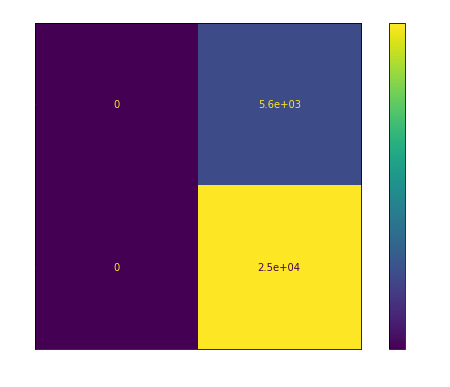

In [ ]:
matrix = plot_confusion_matrix(bnb, x_test, y_test)
matrix.ax_.set_title("Confusion Matrix", color="white")
plt.xlabel("Predicted Label", color="white")
plt.ylabel("True Label", color="white")
plt.gcf().axes[0].tick_params(colors = "white")
plt.gcf().axes[1].tick_params(colors = "white")
plt.gcf().set_size_inches(10, 6)
plt.show()

## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
acc= cross_val_score(bnb,X,y,cv=10)
acc

array([0.81611652, 0.81606681, 0.81606681, 0.81606681, 0.81606681,
       0.81606681, 0.81606681, 0.81610738, 0.81610738, 0.81595824])

Görüldüğü üzere verisetini 10 parçaya ayırıp öğrenme işlemi uyguladığımız zaman da başarı oranlarımız yüzde 81 civarlarında. Bu da sağlıklı ve doğru bir makine öğrenmesi işlemi uyguladığımızı gösteriyor.

## Deep Learning ile Tahmin 

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(140809, 25)
(60348, 25)


In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
4401/4401 [==============================] - 7s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8168
Epoch 2/20
4401/4401 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8163
Epoch 3/20
4401/4401 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8168
Epoch 4/20
4401/4401 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8177
Epoch 5/20
4401/4401 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8173
Epoch 6/20
4401/4401 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8159
Epoch 7/20
4401/4401 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8158
Epoch 8/20
4401/4401 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8163
Epoch 9/20
4401/4401 [==============================] - 7s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8163
Epoch 10/20
4401/4401 [=======================